## Imports

In [2]:
%pip install pandas matplotlib seaborn

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.6 MB 10.5 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.6 MB 15.2 MB/s eta 0:00:01
   ------------------------------------ --- 10.5/11.6 MB 18.7 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 17.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------- ------------------- 3.9/7.8 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 19.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 20.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 21.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

In [88]:
train_data = keras.utils.image_dataset_from_directory(
    directory='./train', # path to the directory where the data is located
    labels='inferred',  # 0 for cat, 1 for dog
    label_mode='int', 
    batch_size=16, 
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.


In [89]:
vali_data = keras.utils.image_dataset_from_directory(
    directory='./test',
    labels='inferred',
    label_mode='int',
    batch_size=16,
    image_size=(256, 256),
)

Found 5000 files belonging to 2 classes.


In [90]:
def process(image, label):
    image = tf.cast(image/255.0, tf.float32)
    return image, label

train_data = train_data.map(process)
vali_data = vali_data.map(process)

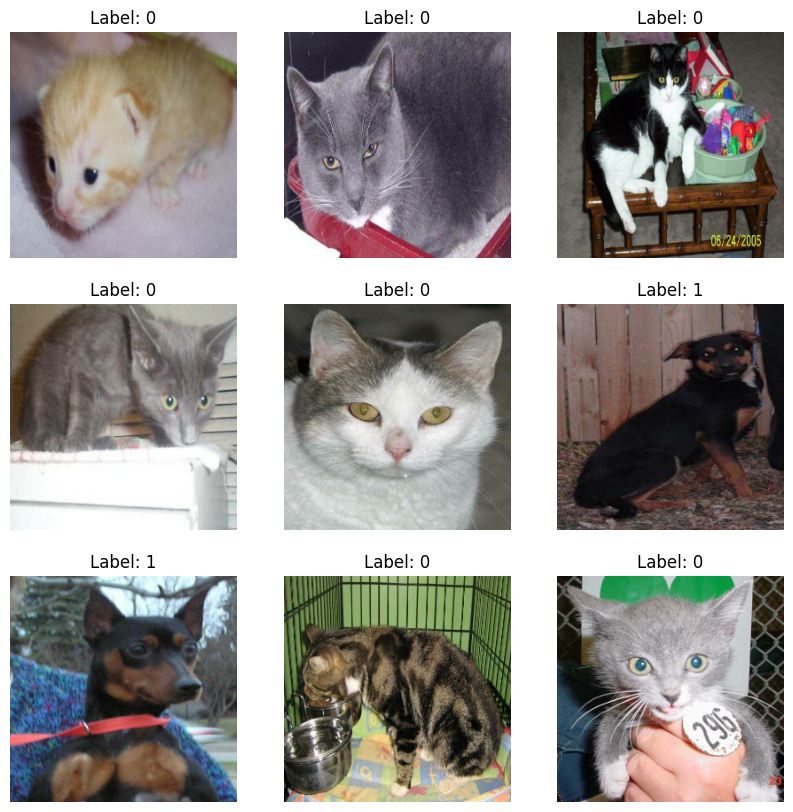

In [91]:
plt.figure(figsize=(10, 10))
for images, labels in vali_data.take(1):  # Take one batch of data
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")

In [19]:
print(images[1].numpy())


[[[0.32953268 0.46950227 0.5720665 ]
  [0.3335888  0.4518333  0.56722087]
  [0.3374464  0.4364813  0.567356  ]
  ...
  [0.28471854 0.25877756 0.21472177]
  [0.26080117 0.24285538 0.24298066]
  [0.27289206 0.2467125  0.30437183]]

 [[0.31986552 0.45331153 0.5591376 ]
  [0.3217831  0.44002756 0.55541515]
  [0.3309819  0.43001685 0.56089157]
  ...
  [0.24364361 0.213334   0.18315546]
  [0.23122038 0.2138557  0.20631534]
  [0.21047573 0.20220366 0.22256212]]

 [[0.3213624  0.45469573 0.5630138 ]
  [0.3240043  0.44224876 0.5576363 ]
  [0.33240175 0.43325388 0.56321996]
  ...
  [0.25564405 0.21405682 0.21150342]
  [0.25862098 0.24982554 0.23546176]
  [0.23567764 0.24298464 0.21809186]]

 ...

 [[0.38817573 0.4901365  0.48621494]
  [0.4178879  0.5109409  0.4991762 ]
  [0.56309396 0.6400624  0.6292934 ]
  ...
  [0.5982364  0.6570599  0.643432  ]
  [0.5262298  0.57237124 0.5698207 ]
  [0.50133556 0.53567994 0.54595876]]

 [[0.54812396 0.65008473 0.64616317]
  [0.5878462  0.6808992  0.6691345 ]


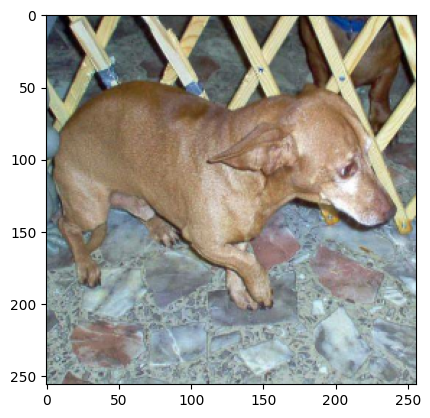

In [20]:
plt.imshow(images[1].numpy())

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import *
from keras.applications import VGG16, ResNet50, InceptionV3 # pretrained models

In [48]:
%pip install opencv-python
import cv2

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.5 MB 8.4 MB/s eta 0:00:05
   ----- ---------------------------------- 5.0/39.5 MB 15.1 MB/s eta 0:00:03
   --------- ------------------------------ 9.2/39.5 MB 17.3 MB/s eta 0:00:02
   -------------- ------------------------- 13.9/39.5 MB 18.5 MB/s eta 0:00:02
   ------------------- -------------------- 18.9/39.5 MB 19.8 MB/s eta 0:00:02
   ----------------------- ---------------- 23.6/39.5 MB 20.2 MB/s eta 0:00:01
   --------------------------- ------------ 27.0/39.5 MB 20.6 MB/s eta 0:00:01
   --------------------------------- ------ 33.0/39.5 MB 20.8 MB/s eta 0:00:01
   -------------------------------------- - 37.7/39.5 MB 21.0 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 20.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## CNN model

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding="valid", 
                activation="relu", input_shape=(256,256,3))) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="valid")) 

model.add(Conv2D(64, kernel_size=(3,3), padding="valid", 
                activation="relu")) 
model.add(BatchNormalization()) 
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(128, kernel_size=(3,3), padding="valid", 
                activation="relu")) 
model.add(BatchNormalization()) 
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="valid")) 

model.add(Conv2D(150, kernel_size=(3,3), padding="valid", 
                activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="valid")) 

model.add(Conv2D(180, kernel_size=(3,3), padding="valid", 
                activation="relu"))  
model.add(BatchNormalization()) 
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="valid")) 

model.add(Conv2D(250, kernel_size=(3,3), padding="valid", 
                activation="relu")) 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="valid")) 

model.add(Flatten())  # Converts the 2D matrix of features into a 1D vector

# FC layer
model.add(Dense(128, kernel_initializer="he_normal", activation="relu")) 
model.add(Dropout(0.1)) 
model.add(Dense(64, kernel_initializer="he_normal", activation="relu")) 
model.add(Dropout(0.1))

# Output layer
model.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid")) 

model.add(Dropout(0.1)) 

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) 

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [147]:
from tensorflow.keras import backend as K
K.clear_session()

In [85]:
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

In [92]:
history = model.fit(train_data,epochs=10,validation_data=vali_data)

Epoch 1/10
1250/1250 [==============================] - 113s 90ms/step - loss: 1.3150 - accuracy: 0.6357 - val_loss: 0.6162 - val_accuracy: 0.6636
Epoch 2/10
1250/1250 [==============================] - 113s 90ms/step - loss: 1.2841 - accuracy: 0.6875 - val_loss: 0.5180 - val_accuracy: 0.7520
Epoch 3/10
1250/1250 [==============================] - 114s 91ms/step - loss: 1.1722 - accuracy: 0.7563 - val_loss: 0.4461 - val_accuracy: 0.8004
Epoch 4/10
1250/1250 [==============================] - 114s 91ms/step - loss: 1.1453 - accuracy: 0.7956 - val_loss: 0.3640 - val_accuracy: 0.8432
Epoch 5/10
1250/1250 [==============================] - 112s 90ms/step - loss: 1.2223 - accuracy: 0.7207 - val_loss: 0.5963 - val_accuracy: 0.6780
Epoch 6/10
1250/1250 [==============================] - 113s 90ms/step - loss: 1.2032 - accuracy: 0.7429 - val_loss: 0.4506 - val_accuracy: 0.7894
Epoch 7/10
1250/1250 [==============================] - 114s 92ms/step - loss: 1.0715 - accuracy: 0.8108 - val_loss: 0

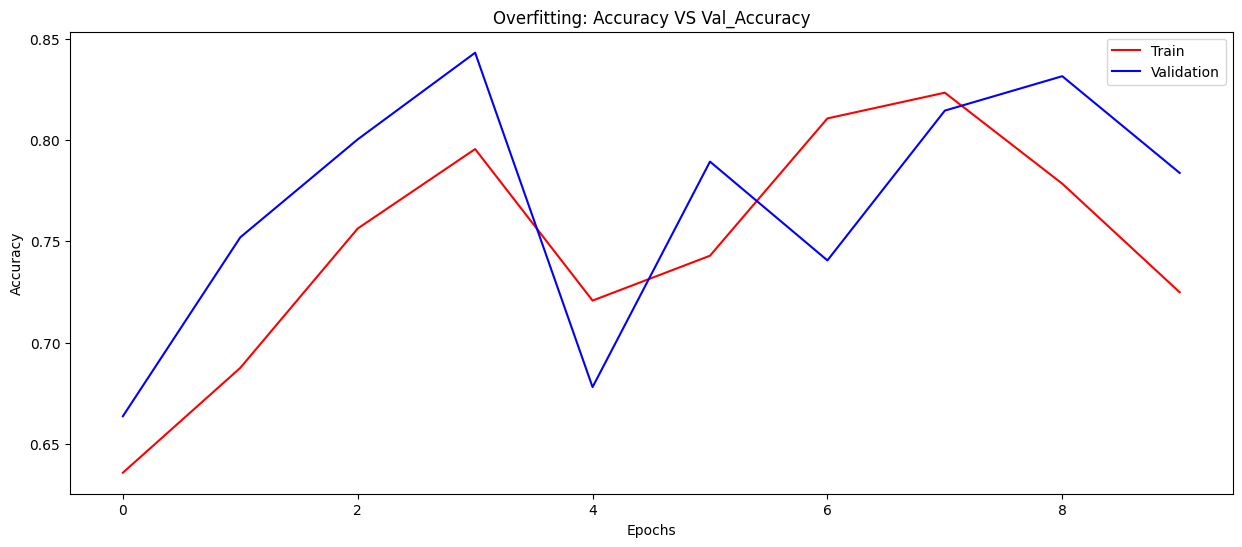

In [93]:
plt.figure(figsize=(15,6))
plt.plot(history.history["accuracy"],color = "red",label = "Train")
plt.plot(history.history["val_accuracy"],color = "blue", label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Overfitting: Accuracy VS Val_Accuracy")
plt.legend()
plt.show()

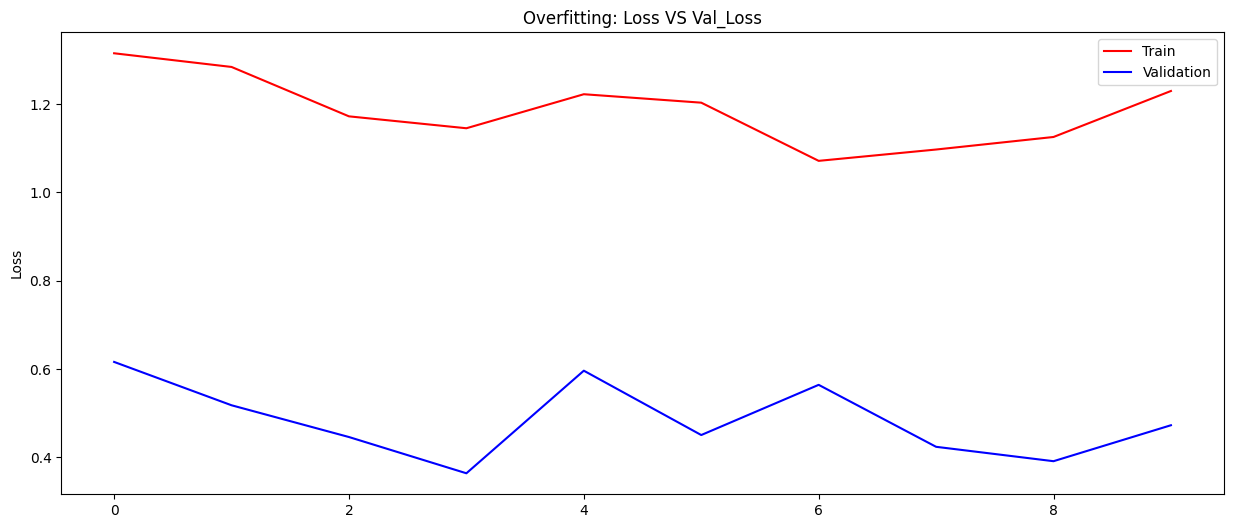

In [94]:
plt.figure(figsize=(15,6))
plt.plot(history.history["loss"],color = "red",label = "Train")
plt.plot(history.history["val_loss"],color = "blue", label = "Validation")
plt.ylabel("Loss")
plt.title("Overfitting: Loss VS Val_Loss")
plt.legend()
plt.show()

### Prediction for CNN

In [95]:
def predict_cnn(test_img):
    test_img = cv2.resize(test_img, (256, 256))
    
    # (1 sample, 256x256 pixels, 3 channels)
    # (batch_size, height, width, channels)
    test_input = test_img.reshape((1, 256, 256, 3))
    
    predictions_cnn = model.predict(test_input)
    
    # if 'Dog' (index 0) is greater than 0.5, predict Dog
    if predictions_cnn[0][0] > 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")

    plt.imshow(test_img)
    plt.show()


1/1 [==============================] - 0s 19ms/step
Prediction: Cat


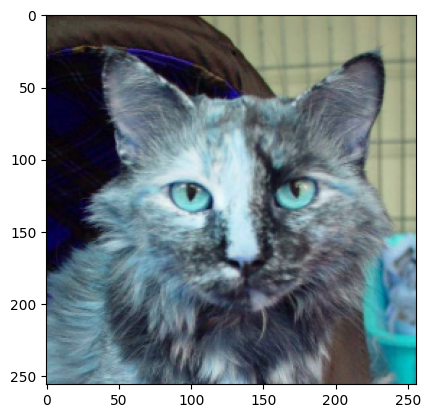

In [101]:
test_img = cv2.imread(r"C:\Users\samir\Desktop\cat-vs-dog\dogs_vs_cats\test\cats\cat.10.jpg") 
predict_cnn(test_img)

1/1 [==============================] - 0s 22ms/step
Prediction: Cat


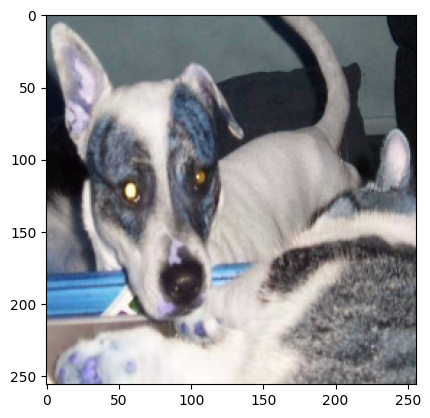

In [103]:
test_img = cv2.imread(r"C:\Users\samir\Desktop\cat-vs-dog\dogs_vs_cats\test\dogs\dog.12390.jpg")
predict_cnn(test_img)

# 😂😂😂😂😂😂😂

1/1 [==============================] - 0s 26ms/step
Prediction: Dog


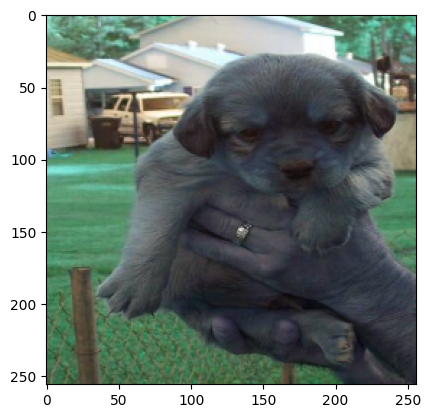

In [ ]:
test_img = cv2.imread(r"C:\Users\samir\Desktop\cat-vs-dog\dogs_vs_cats\test\dogs\dog.75.jpg")
predict_cnn(test_img)

## Let's apply Transfer Learning

## Training VGG16

In [108]:
conv_base = VGG16(
    weights="imagenet",
    include_top=False, 
    input_shape=(150, 150, 3)
)

In [141]:
vgg = Sequential()

vgg.add(conv_base)
vgg.add(Flatten())


vgg.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(256, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
vgg.add(Dropout(0.2))
vgg.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))


vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               3

In [142]:
batch_size = 16  ## cause hamro ma 32 le crash gardinxa😂

train_dg = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)
test_dg = ImageDataGenerator(rescale = 1./255)

train_gen = train_dg.flow_from_directory('./train',
                                        target_size = (150,150),
                                        batch_size = batch_size,
                                        class_mode = "binary")

test_gen = test_dg.flow_from_directory('./test',
                                        target_size = (150,150),
                                        batch_size = batch_size,
                                        class_mode = "binary")

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [143]:
vgg.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [144]:
import warnings
warnings.filterwarnings("ignore")

There's some problem with this notebook and it says that restart the kernel, but i think experimenting with another notebook would be more practical.

# ---------End of the Notebook part 1 ---------------

In [146]:
history2 = vgg.fit_generator(train_gen,
                            epochs=10,
                            validation_data = test_gen)

NameError: name 'scipy' is not defined

In [135]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [136]:
import scipy

C:\Users\samir\AppData\Local\Temp\ipykernel_1160\1577938956.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = vgg.fit_generator(train_gen,


NameError: name 'scipy' is not defined